# **Task C1** 
## Analyzing the Avocado Data

##### This task uses the avocado dataset. The dataset contains historical data on avocado prices and sales volume in multiple U.S. markets. One of the columns in this dataset, Unnamed: 0, contains sequential numbers that are irrelevant to analyzing this data. Three of the other columns contain sales for PLU (price look-up) codes 4046, 4225, and 4770. These columns will not be used in this task. If you review the data, you’ll see that some of the regions overlap. For example, one of the regions is the entire U.S., and all of the other regions are parts of the U.S. Because of that, you would need to review this data carefully before determining the best way to analyze it. For the purposes of this task though, the overlapping regions won’t be taken into consideration.

##### https://www.kaggle.com/neuromusic/avocado-prices

<img src="avocado-logo.png" alt="SIT112 Avocado!" width="1800" height="200">




### A. Instructions

1. Make sure you have completed Task P1 before working on this task. 
2. Complete the task based on the comments and hints provided in the following sections.   
3. Complete the TaskCompletionReport from. 
4. Before submission, please make sure you have executed all the cells in your jupyter notebook without any error; otherwise, your submission may not be flagged as complete. 
5. Submit (1) the TaskCompletionReport as a "PDF" file and (2) your solution (code) as an "ipynb" file (do not zip/combine them). You can do this by the end of Week 12, but feedback will only be provided for submissions received by 11 AM on the due date. <font color="red">Please do not include the dataset in your submission. </font>
6. The workshops are the primary venue for you to seek help if you need any clarification/assitance. The tutors are there to help you complete and submit the tasks. Please avoid emailing your code or screenshots to the tutors outside workshop hours. 
7. Consider using online resources such as ChatGPT to strenghten your undertanding of the task. 

Good luck :)

### B. Write Python code that performs (answers) the following operations (questions) 

In [183]:
import pandas as pd

##### 1. Read the data from the CSV file into a DataFrame.

In [184]:
avo_data = pd.read_csv('./avocado.csv')

##### 2. Multiply the Total Volume and AveragePrice columns, and store the result in a new column called EstimatedRevenue. Then, calculate the EstimatedRevenue for each region, sort the resulting data in descending order by EstimatedRevenue, and display the top 5 regions, except TotalUS, with the highest EstimatedRevenue.

* Hint: the estimated revenue of region x = sum of the estimated revenues in region x

In [185]:
# write your code here

# multiply the Total Volume and AveragePrice columns to create a new column called EstimatedRevenue

avo_data['EstimatedRevenue'] =  ( avo_data['Total Volume'] * avo_data['AveragePrice'] )

# group the data by region and calculate the total estimated revenue for each region 
region_est_revenue = avo_data.groupby('region')['EstimatedRevenue'].sum().reset_index() # The `['EstimatedRevenue']` accesses the list by keyword.

# exclude TotalUS

region_est_revenue = region_est_revenue[region_est_revenue['region'] != 'TotalUS'] # boolean indexing to filter out vals that don't pass the condition.

# sort the data in descending order by EstimatedRevenue and display the top 5 regions with the highest revenue

top_five_region_highest_revenue = region_est_revenue.sort_values('EstimatedRevenue', ascending=False).head(5) #` ascending=False` implies `Descending`
display(top_five_region_highest_revenue)


,region,EstimatedRevenue
6,California,1.121414e+09
52,West,1.066834e+09
29,Northeast,9.600079e+08
45,SouthCentral,8.740593e+08
46,Southeast,7.036306e+08


##### 3. Create a bar plot that shows the mean, median, and standard deviation of the Total Volume of the organic avocados sold in the regions with the highest overall Total Volume from (including) 2017.

,sum,mean,median,std
region,,,,
Northeast,15832064.76,243570.227077,233976.66,99930.570938
West,15301595.38,235409.159692,215628.86,80717.592835
GreatLakes,11576135.45,178094.391538,169816.92,48354.489850
California,10714914.36,164844.836308,167193.75,33361.497553
Midsouth,9242909.69,142198.610615,139274.81,32964.267698


<Axes: xlabel='region'>

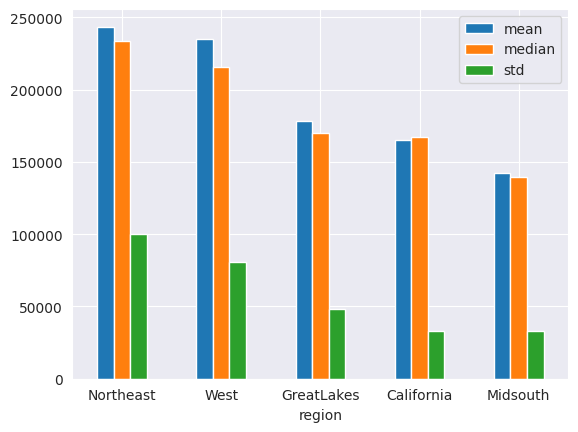

In [186]:
# write your code here

# Using the `query()` method for filtering
organic_avos_by_region_from_2017_and_greater = avo_data.query('region != "TotalUS" and type == "organic" and year >= 2017').groupby('region')['Total Volume'].agg(['sum', 'mean', 'median', 'std'])

# Get the 5 regions with the highest Total Volume and extract their data.
top_five_regions_max_total_vol = organic_avos_by_region_from_2017_and_greater.sort_values('sum', ascending=False).head(5)

# Print data that will be graphed
display(top_five_regions_max_total_vol)
# Create a bar plot showing the mean, median, and standard deviation of the Total Volume of organic avocados in the 5 regions with the highest Total Volume from 2017.
top_five_regions_max_total_vol.plot(kind='bar', y=['mean', 'median', 'std'], rot=0)

##### 4. What is the mean and median of AveragePrice for each type of avocado (organic and conventional) in 2018? Be sure to include just the type, MeanPrice, and MedianPrice columns in the results.

In [187]:
# write your code here

# Extract the data for organic and conventional avocados in 2018.
avo_data_2018 = avo_data.query('year == 2018 and type == "organic" or type == "conventional"').groupby('type')['AveragePrice'].agg(['mean', 'median'])

# Select the 'type', 'MeanPrice', and 'MedianPrice' columns and display the results.
avo_data_2018.columns = ['MeanPrice', 'MedianPrice']
avo_data_2018.reset_index(inplace=True) # The `inplace` kwarg modifies the existing DF - a new one is not returned
display(avo_data_2018)

,type,MeanPrice,MedianPrice
0,conventional,1.158040,1.13
1,organic,1.567176,1.55


##### 5. Analyze the consistency of sales for Small Bags, Large Bags, XLarge Bags, and Total Bags of the top 3 avocado producing regions (excluding TotalUS) for each type of avocado over time. 

##### *To explain consistency of sales, use the coefficient of variation, which is a statistical measure used to determine the consistency or variability of a data set. It is calculated as the ratio of the standard deviation to the mean, expressed as a percentage. Higher values of the coefficient of variation indicate greater variability or inconsistency in the data, while lower values indicate more consistency in the data.* 

In [188]:
# write your code here

# Get the top 3 regions (excluding TotalUS) with the highest sum of Total Volume
top_3_regions = avo_data.query('region != "TotalUS"').groupby('region').sum().sort_values('Total Volume', ascending=False).head(3).index.to_list()


# Get the sales of Small Bags, Large Bags, XLarge Bags, and Total Bags for each region and type of avocado
# avo_sales_by_region_and_type = avo_data[avo_data.region.isin(top_3_regions)].groupby(['region', 'year', 'type']).agg({'Small Bags':'sum', 'Large Bags':'sum', 'XLarge Bags':'sum', 'Total Bags':'sum'})

avo_sales_by_region_and_type = avo_data[avo_data['region'].isin(top_3_regions)].groupby(['region', 'year', 'type'])[['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].sum()

display(avo_sales_by_region_and_type)

# Calculate the coefficient of variation for each region and bag type, by dividing the standard deviation of the bags sold by the mean number of bags sold.
# Note: I copied the formula for this from the `C1-Solution.ipynb` file
cv_by_region_bag_type = avo_sales_by_region_and_type.groupby(['region', 'type']).std() / avo_sales_by_region_and_type.groupby(['region', 'type']).mean()

# Print the results
display(avo_sales_by_region_and_type.groupby(['region', 'type']).std())
display(cv_by_region_bag_type.head())



Total Bags   Small Bags   Large Bags  \
region       year type                                                   
California   2015 conventional  3.636839e+07  34078765.73   2090465.47   
                  organic       6.937298e+05    656128.13     37601.63   
             2016 conventional  9.270718e+07  83648996.25   7698289.97   
                  organic       3.392457e+06   3068319.08    324138.07   
             2017 conventional  8.612728e+07  81759787.98   1549114.20   
                  organic       3.709751e+06   3517682.07    192069.23   
             2018 conventional  2.263869e+07  21324023.75    419525.44   
                  organic       1.044709e+06   1043976.90       731.90   
SouthCentral 2015 conventional  3.487335e+07  28453748.05   6219047.73   
                  organic       1.147007e+06   1106536.18     40470.82   
             2016 conventional  6.500447e+07  52540048.37  11134256.56   
                  organic       3.774016e+06   3283400.79    490614.72   
             2017 conventional  9.008051e+07  67616270.90  21817423.52   
                  organic       5.072113e+06   4699475.63    372637.75   
             2018 conventional  3.209319e+07  25915048.41   5715567.67   
                  organic       1.347776e+06   1200955.49    146820.62   
West         2015 conventional  4.945964e+07  35859556.76  13546516.13   
                  organic       2.668251e+06    416843.63   2251407.67   
             2016 conventional  1.283644e+08  82758806.85  45335652.23   
                  organic       5.587562e+06   2036082.92   3551479.57   
             2017 conventional  1.349986e+08  81865880.81  52827919.71   
                  organic       7.941810e+06   3570975.37   4368902.45   
             2018 conventional  3.597861e+07  15121922.88  20656272.91   
                  organic       2.074684e+06   1079220.16    993556.61   

                                XLarge Bags  
region       year type                       
California   2015 conventional    199155.11  
                  organic              0.00  
             2016 conventional   1359896.24  
                  organic              0.00  
             2017 conventional   2818380.80  
                  organic              0.00  
             2018 conventional    895145.76  
                  organic              0.00  
SouthCentral 2015 conventional    200554.37  
                  organic              0.00  
             2016 conventional   1330166.07  
                  organic              0.00  
             2017 conventional    646814.28  
                  organic              0.00  
             2018 conventional    462576.42  
                  organic              0.00  
West         2015 conventional     53564.84  
                  organic              0.00  
             2016 conventional    269972.08  
                  organic              0.00  
             2017 conventional    304844.89  
                  organic           1932.36  
             2018 conventional    200412.91  
                  organic           1907.57

Total Bags    Small Bags    Large Bags  \
region       type                                                     
California   conventional  3.514518e+07  3.218931e+07  3.248096e+06   
             organic       1.560389e+06  1.431104e+06  1.488754e+05   
SouthCentral conventional  2.744378e+07  1.999057e+07  7.474870e+06   
             organic       1.910286e+06  1.737775e+06  2.056253e+05   
West         conventional  5.172745e+07  3.388273e+07  1.893926e+07   
             organic       2.723219e+06  1.368988e+06  1.482123e+06   

                            XLarge Bags  
region       type                        
California   conventional  1.108079e+06  
             organic       0.000000e+00  
SouthCentral conventional  4.828260e+05  
             organic       0.000000e+00  
West         conventional  1.112425e+05  
             organic       1.108539e+03

Total Bags  Small Bags  Large Bags  XLarge Bags
region       type                                                         
California   conventional    0.591069    0.583109    1.105039     0.840635
             organic         0.706007    0.690845    1.073864          NaN
SouthCentral conventional    0.494368    0.458171    0.666116     0.731524
             organic         0.673768    0.675496    0.782929          NaN
West         conventional    0.593202    0.628604    0.572329     0.536888

### C. Learn more
* https://www.statisticshowto.com/probability-and-statistics/how-to-find-a-coefficient-of-variation/